In [1]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import sys
workingdir = '/content/gdrive/My Drive/Colab Notebooks/EVA4/Session9'
sys.path.append(workingdir)

In [0]:
%matplotlib inline
import torch
import torchvision
import numpy as np
from utils import datapreparation
from utils import display
from model import dnn
from model import resnet
from utils import training
from utils import evaluate
from utils import gradcam
from utils import gradvisualize

In [4]:
classes, trainloader, testloader = datapreparation.load(albumentations=True)

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


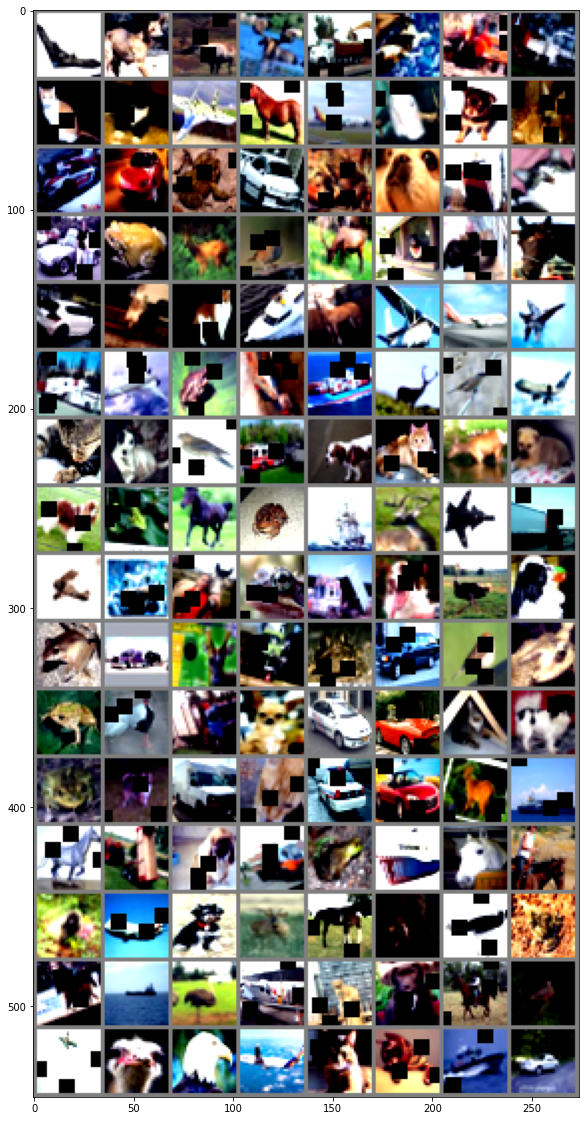

In [5]:
display.show_images(trainloader, classes, 20)

In [6]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
net = resnet.ResNet18()
model = net.to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)

In [10]:
EPOCHS = 20
misclassified_imgs = []
correct_imgs = []
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    training.train_model(model, device, trainloader, optimizer, criterion, epoch)
    misclassified_imgs, correct_imgs = training.test_model(model, device, criterion, testloader, epoch==EPOCHS-1)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=0.5787883996963501 Batch_id=390 Accuracy=72.77: 100%|██████████| 391/391 [00:33<00:00, 11.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 7697/10000 (76.97%)

EPOCH: 2


Loss=0.6282327175140381 Batch_id=390 Accuracy=76.91: 100%|██████████| 391/391 [00:33<00:00, 11.77it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 7924/10000 (79.24%)

EPOCH: 3


Loss=0.37652668356895447 Batch_id=390 Accuracy=79.72: 100%|██████████| 391/391 [00:33<00:00, 11.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8164/10000 (81.64%)

EPOCH: 4


Loss=0.6407901048660278 Batch_id=390 Accuracy=81.86: 100%|██████████| 391/391 [00:33<00:00, 11.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8130/10000 (81.30%)

EPOCH: 5


Loss=0.540080726146698 Batch_id=390 Accuracy=83.51: 100%|██████████| 391/391 [00:33<00:00, 11.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8222/10000 (82.22%)

EPOCH: 6


Loss=0.5871359705924988 Batch_id=390 Accuracy=84.68: 100%|██████████| 391/391 [00:33<00:00, 11.57it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8459/10000 (84.59%)

EPOCH: 7


Loss=0.450442373752594 Batch_id=390 Accuracy=85.89: 100%|██████████| 391/391 [00:33<00:00, 11.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 8497/10000 (84.97%)

EPOCH: 8


Loss=0.43173566460609436 Batch_id=390 Accuracy=86.91: 100%|██████████| 391/391 [00:33<00:00, 11.69it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 8432/10000 (84.32%)

EPOCH: 9


Loss=0.40507420897483826 Batch_id=390 Accuracy=88.09: 100%|██████████| 391/391 [00:32<00:00, 11.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8607/10000 (86.07%)

EPOCH: 10


Loss=0.3858039975166321 Batch_id=390 Accuracy=88.63: 100%|██████████| 391/391 [00:33<00:00, 11.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8580/10000 (85.80%)

EPOCH: 11


Loss=0.3111499845981598 Batch_id=390 Accuracy=89.68: 100%|██████████| 391/391 [00:32<00:00, 11.87it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 8749/10000 (87.49%)

EPOCH: 12


Loss=0.3805299401283264 Batch_id=390 Accuracy=90.03: 100%|██████████| 391/391 [00:33<00:00, 11.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8680/10000 (86.80%)

EPOCH: 13


Loss=0.2986176908016205 Batch_id=390 Accuracy=90.81: 100%|██████████| 391/391 [00:33<00:00, 11.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8661/10000 (86.61%)

EPOCH: 14


Loss=0.22821584343910217 Batch_id=390 Accuracy=91.25: 100%|██████████| 391/391 [00:32<00:00, 11.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8710/10000 (87.10%)

EPOCH: 15


Loss=0.25149261951446533 Batch_id=390 Accuracy=91.87: 100%|██████████| 391/391 [00:33<00:00, 11.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 8677/10000 (86.77%)

EPOCH: 16


Loss=0.3215191960334778 Batch_id=390 Accuracy=92.24: 100%|██████████| 391/391 [00:32<00:00, 12.00it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8716/10000 (87.16%)

EPOCH: 17


Loss=0.19442115724086761 Batch_id=390 Accuracy=92.69: 100%|██████████| 391/391 [00:32<00:00, 11.91it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8749/10000 (87.49%)

EPOCH: 18


Loss=0.22862377762794495 Batch_id=390 Accuracy=93.15: 100%|██████████| 391/391 [00:32<00:00, 11.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8756/10000 (87.56%)

EPOCH: 19


Loss=0.15736845135688782 Batch_id=390 Accuracy=93.49: 100%|██████████| 391/391 [00:33<00:00, 11.74it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8768/10000 (87.68%)

EPOCH: 20


Loss=0.12918952107429504 Batch_id=390 Accuracy=93.65: 100%|██████████| 391/391 [00:32<00:00, 11.94it/s]



Test set: Average loss: 0.0033, Accuracy: 8813/10000 (88.13%)



In [12]:
misclassified_imgs[0]

{'img': tensor([[[ 1.1222,  1.0746,  1.0746,  ...,  1.0746,  1.0746,  1.1222],
          [ 1.0905,  1.0270,  1.0429,  ...,  1.0429,  1.0270,  1.0905],
          [ 1.0905,  1.0429,  1.0429,  ...,  1.0429,  1.0429,  1.0905],
          ...,
          [ 1.0587,  0.4396,  0.6936,  ...,  1.0270,  1.0270,  1.0905],
          [ 1.0429,  0.0269, -0.4335,  ...,  1.0429,  1.0429,  1.0905],
          [ 1.0746,  0.5825,  0.0269,  ...,  1.0429,  1.0429,  1.0905]],
 
         [[ 1.1765,  1.1282,  1.1282,  ...,  1.1282,  1.1282,  1.1765],
          [ 1.1443,  1.0799,  1.0960,  ...,  1.0960,  1.0799,  1.1443],
          [ 1.1443,  1.0960,  1.0960,  ...,  1.0960,  1.0960,  1.1443],
          ...,
          [ 1.0638,  0.3551,  0.5162,  ...,  1.0799,  1.0799,  1.1443],
          [ 1.1926,  0.0974, -0.4341,  ...,  1.0960,  1.0799,  1.1443],
          [ 1.1926,  0.6773,  0.0974,  ...,  1.0960,  1.0799,  1.1443]],
 
         [[ 1.2313,  1.1863,  1.1863,  ...,  1.1863,  1.1863,  1.2313],
          [ 1.2013,  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:  plane  bird truck  frog   dog
Predicted:  plane  bird truck  frog   dog


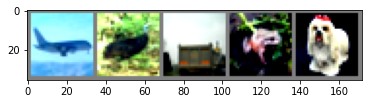

In [13]:
evaluate.show_predicted_actual(model, device, testloader, classes)

In [14]:
evaluate.evaluate_accuracy(model, device, testloader)

Accuracy of the network on the 10000 test images: 88 %


In [15]:
evaluate.evaluate_classwise_accuracy(model, device, classes, testloader)

Accuracy of plane : 92 %
Accuracy of   car : 93 %
Accuracy of  bird : 70 %
Accuracy of   cat : 81 %
Accuracy of  deer : 76 %
Accuracy of   dog : 77 %
Accuracy of  frog : 91 %
Accuracy of horse : 87 %
Accuracy of  ship : 85 %
Accuracy of truck : 86 %


In [16]:
target_layers = ['layer1','layer2','layer3','layer4']
viz_cam = gradvisualize.VisualizeCam(model, classes, target_layers)
print(viz_cam)

In [17]:
print(misclassified_imgs[0]["img"])

tensor([[[ 1.1222,  1.0746,  1.0746,  ...,  1.0746,  1.0746,  1.1222],
         [ 1.0905,  1.0270,  1.0429,  ...,  1.0429,  1.0270,  1.0905],
         [ 1.0905,  1.0429,  1.0429,  ...,  1.0429,  1.0429,  1.0905],
         ...,
         [ 1.0587,  0.4396,  0.6936,  ...,  1.0270,  1.0270,  1.0905],
         [ 1.0429,  0.0269, -0.4335,  ...,  1.0429,  1.0429,  1.0905],
         [ 1.0746,  0.5825,  0.0269,  ...,  1.0429,  1.0429,  1.0905]],

        [[ 1.1765,  1.1282,  1.1282,  ...,  1.1282,  1.1282,  1.1765],
         [ 1.1443,  1.0799,  1.0960,  ...,  1.0960,  1.0799,  1.1443],
         [ 1.1443,  1.0960,  1.0960,  ...,  1.0960,  1.0960,  1.1443],
         ...,
         [ 1.0638,  0.3551,  0.5162,  ...,  1.0799,  1.0799,  1.1443],
         [ 1.1926,  0.0974, -0.4341,  ...,  1.0960,  1.0799,  1.1443],
         [ 1.1926,  0.6773,  0.0974,  ...,  1.0960,  1.0799,  1.1443]],

        [[ 1.2313,  1.1863,  1.1863,  ...,  1.1863,  1.1863,  1.2313],
         [ 1.2013,  1.1414,  1.1564,  ...,  1

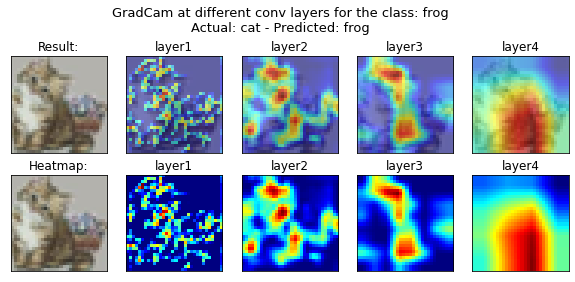

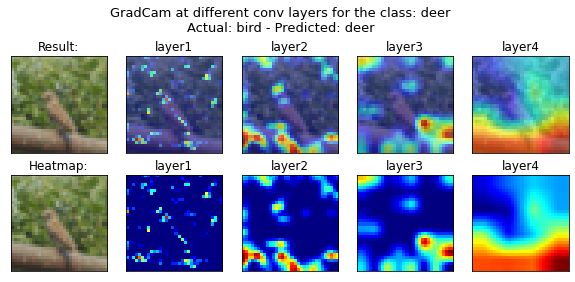

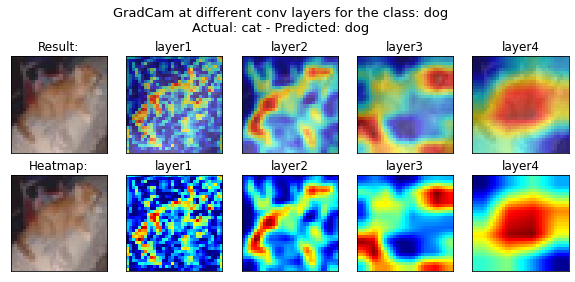

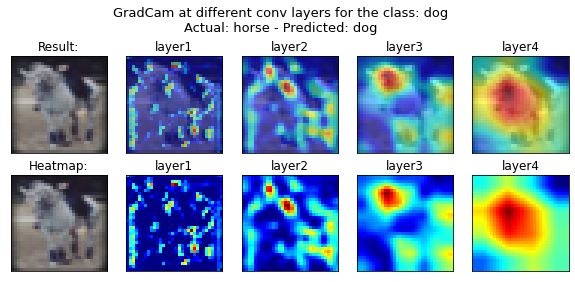

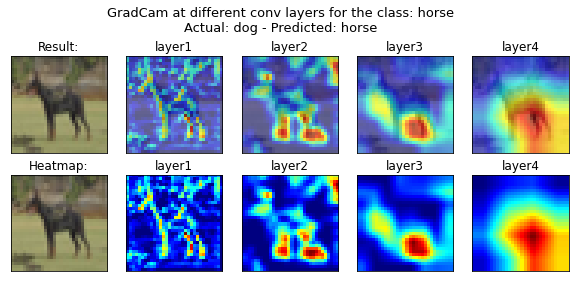

In [18]:
#GradCam for incorrectly classified images

num_img = 5
incorrect_pred_imgs = []
truth_inds = []
for i in range(num_img):
  incorrect_pred_imgs.append(torch.as_tensor(misclassified_imgs[i]["img"]))
  truth_inds.append(misclassified_imgs[i]["target"])
  #incorrect_pred_imgs
viz_cam(torch.stack(incorrect_pred_imgs), truth_inds, target_layers, metric="incorrect")